In [1]:
# Adding src module to path
import sys
import os
from tqdm import tqdm
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\overs\Python\Master-Thesis-Project


In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced, RandomHamiltonian


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [3]:

#Initializing starting values 
seed = 44

#Finding true ground state energy and displaying it
np.random.seed(seed)

energy_list=[]
true_energy_list=[]
time_list = []

for v in [4,5,6]:
    
            
    np.random.seed(seed)


    rh = RandomHamiltonian(n=v)

    
    eig,_ = np.linalg.eigh(rh)
    E_truth = np.min(eig)
    true_energy_list.append(E_truth)

    
    energies=[]
    times = []
    labels = []
    for i in tqdm(range(1, 8)): 
        visible_size = v
        hidden_size = i*2
        
        np.random.seed(seed)

        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=rh, walker_steps=1000)

        energies.append(rbm.train(iterations=1000, lr=0.01, print_energy=False))
        time_list.append(rbm.train.run_time)

        labels.append([f"Hidden size = {hidden_size}"])
        
    
        # Print loop    
    
    
    energy_list.append(energies)


 14%|███████████▊                                                                       | 1/7 [03:55<23:30, 235.09s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7AF0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 235.08616638183594 sec


 29%|███████████████████████▋                                                           | 2/7 [07:50<19:36, 235.29s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7E20>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 235.43275833129883 sec


 43%|███████████████████████████████████▌                                               | 3/7 [11:55<15:59, 239.89s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7DC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 245.37008690834045 sec


 57%|███████████████████████████████████████████████▍                                   | 4/7 [16:10<12:16, 245.65s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7EE0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 254.47704148292542 sec


 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [20:24<08:17, 248.78s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7E80>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 254.31485080718994 sec


 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [24:35<04:09, 249.63s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7A30>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 251.29439735412598 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [28:48<00:00, 246.86s/it]


func:train args:[(<src.nqs.RBM object at 0x0000021D001B7AC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 252.0309121608734 sec


 14%|███████████▊                                                                       | 1/7 [04:02<24:13, 242.25s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7850>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 242.25154495239258 sec


 29%|███████████████████████▋                                                           | 2/7 [08:05<20:15, 243.05s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7DC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 243.60642004013062 sec


 43%|███████████████████████████████████▌                                               | 3/7 [12:16<16:26, 246.55s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7F40>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 250.7091100215912 sec


 57%|███████████████████████████████████████████████▍                                   | 4/7 [16:10<12:04, 241.58s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7850>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 233.95602869987488 sec


 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [20:06<07:58, 239.40s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7AF0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 235.53517127037048 sec


 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [24:02<03:58, 238.42s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7100>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 236.50732231140137 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [27:56<00:00, 239.46s/it]


func:train args:[(<src.nqs.RBM object at 0x0000021D001B7E20>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 233.62133932113647 sec


 14%|███████████▊                                                                       | 1/7 [03:42<22:12, 222.08s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7AC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 222.07419180870056 sec


 29%|███████████████████████▋                                                           | 2/7 [07:25<18:34, 222.97s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7730>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 223.5981957912445 sec


 43%|███████████████████████████████████▌                                               | 3/7 [11:11<14:57, 224.47s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D0019A550>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 226.25402760505676 sec


 57%|███████████████████████████████████████████████▍                                   | 4/7 [15:00<11:18, 226.18s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7DC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 228.80299067497253 sec


 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [18:53<07:36, 228.39s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7730>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 232.31395292282104 sec


 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [22:46<03:50, 230.03s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B76A0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 233.21343636512756 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [26:41<00:00, 228.82s/it]

func:train args:[(<src.nqs.RBM object at 0x0000021D001B7760>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 235.47638964653015 sec


<IPython.core.display.Javascript object>


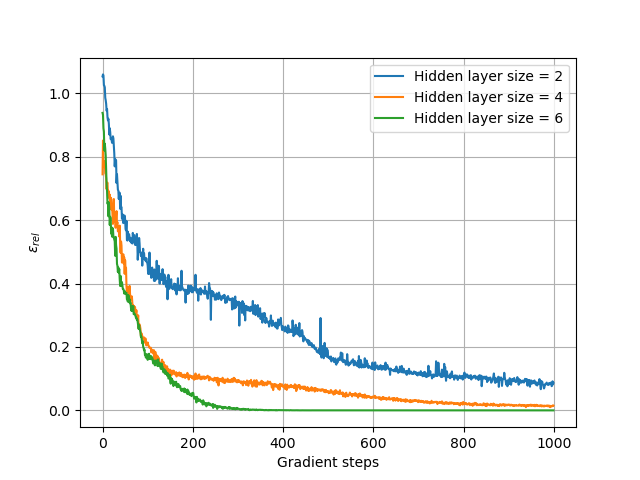

In [15]:
labels = [f"{i}" for i in range(2, 17, 2)]
run = 0
selection = []
plt.figure(run)
for energy in [energy_list[run][i] for i in [0,1,2]]:
    plt.plot((energy-true_energy_list[run])/np.abs(true_energy_list[run]))
    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()
plt.legend([f"Hidden layer size = {labels[i]}" for i in [0,1,2]])








In [16]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/RandomHidden_sizeV4.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

<IPython.core.display.Javascript object>


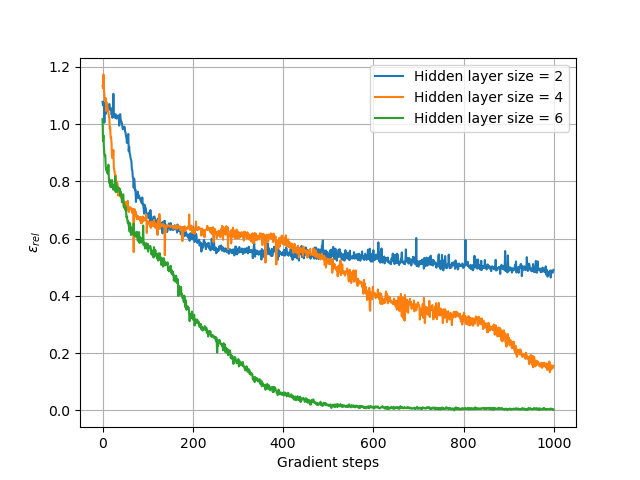

In [17]:
run = 1
plt.figure(run)

selection = [0,1,2]

for energy in [energy_list[run][i] for i in selection]:
    plt.plot((energy-true_energy_list[run])/np.abs(true_energy_list[run]))
    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()

plt.legend([f"Hidden layer size = {labels[i]}" for i in selection])




In [18]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/RandomHidden_sizeV5.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

<IPython.core.display.Javascript object>


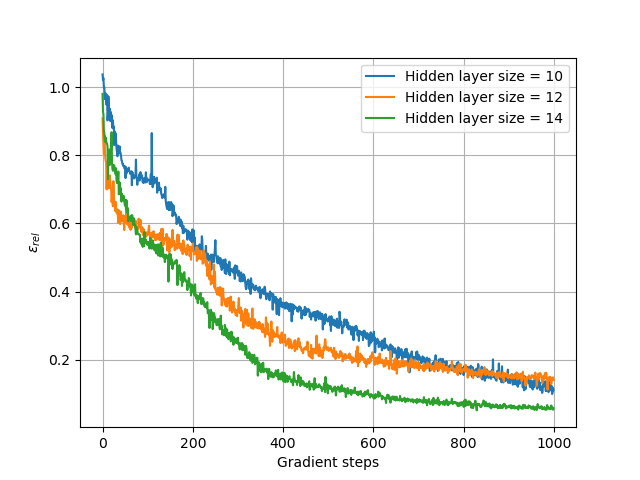

In [14]:

run = 2
plt.figure(run)
selection = [4,5,6]

for energy in [energy_list[run][i] for i in selection]:
    plt.plot((energy-true_energy_list[run])/np.abs(true_energy_list[run]))
    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()

plt.legend([f"Hidden layer size = {labels[i]}" for i in selection])


In [64]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/Hidden_sizeV6.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")